In [3]:
import os
from os.path import isfile,join

import numpy as np
import matplotlib.pyplot as plt
import re

import cv2

In [8]:
frames = os.listdir('frames/')
frames.sort(key=lambda frame: int(re.sub('\D','',frame)))

images = []

for frame in frames:
    img = cv2.imread('frames/'+frame)
    images.append(img)

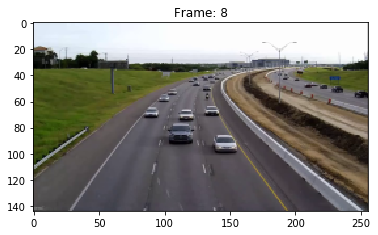

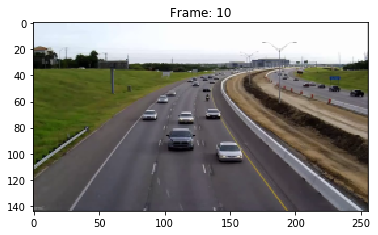

In [15]:
i = 8

for frame in [i,i+2]:
    plt.imshow(cv2.cvtColor(images[frame],cv2.COLOR_BGR2RGB))
    plt.title(f"Frame: {frame}")
    plt.show()

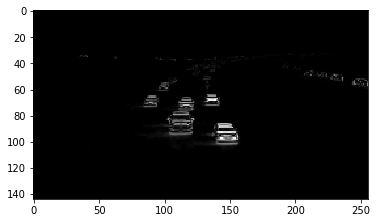

In [20]:
# to see the difference between two of the frames

grayscaleA = cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
grayscaleB = cv2.cvtColor(images[i+1],cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.absdiff(grayscaleB,grayscaleA),cmap='gray')
plt.show()

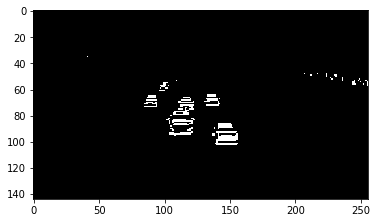

In [21]:
# image thresholding

absdiff_image = cv2.absdiff(grayscaleB,grayscaleA)
ret,thresh_image = cv2.threshold(absdiff_image,30,255,cv2.THRESH_BINARY)

plt.imshow(thresh_image,cmap='gray')
plt.show()

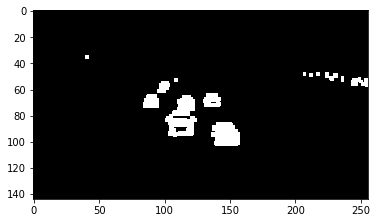

In [25]:
# image dilation

kernel = np.ones((3,3),np.uint8)
dilated_image = cv2.dilate(thresh_image,kernel,iterations=1) #increase of iterations just increases dilation

plt.imshow(dilated_image,cmap='gray')
plt.show()

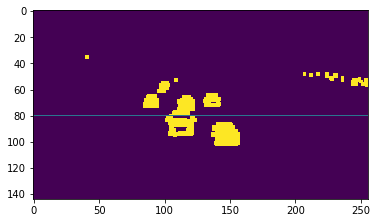

In [30]:
plt.imshow(dilated_image)
cv2.line(dilated_image,(0,80),(256,80),(100,0,0))

plt.show()

In [35]:
contours, hierarchy = cv2.findContours(thresh_image.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

valid_contours = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if(x<=200)&(y>=80)&(cv2.contourArea(cntr)>=25):
        valid_contours.append(cntr)
        
len(valid_contours)

5

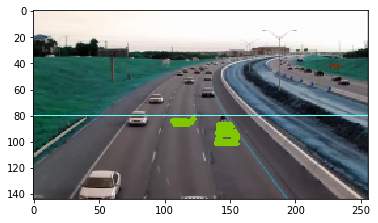

In [37]:
dmy = images[i].copy()

cv2.drawContours(dmy,valid_contours,-1,(127,200,0),2)
cv2.line(dmy,(0,80),(256,80),(100,255,255))
plt.imshow(dmy)
plt.show()